# Dataset generalization

## For every considered model, meta-learn on 16-dimensional halfspace dataset, then transfer rules, and train / test that on MNIST.

Created by Basile Van Hoorick, Fall 2020.

In [6]:
%run FF_common.ipynb

In [2]:
# IMPORTANT: Henceforth, we use GD directly on inputs but use plasticity rules in the output and hidden layers.
opts_up = Options(gd_input=True,
                  use_graph_rule=True,
                  gd_graph_rule=True,
                  use_output_rule=True,
                  gd_output_rule=True,
                  gd_output=False)
opts_down = Options(gd_input=True,
                    use_graph_rule=True,
                    gd_graph_rule=False,  # Not meta-trainable anymore!
                    use_output_rule=True,
                    gd_output_rule=False,  # Not meta-trainable anymore!
                    gd_output=False)
scheme = UpdateScheme(cross_entropy_loss=True,
                      mse_loss=False,
                      update_misclassified_only=False,
                      update_all_edges=True)

# Feed-forward brain config.
n_up = 16  # Input layer size for meta-learning.
n_down = 28 * 28  # Input layer size for desired task training.
m_up = 2  # Output layer size for meta-learning.
m_down = 10  # Output layer size for desired task training.
l = 3  # Number of hidden layers.
w = 32  # Width of hidden layers.
p = 0.5  # Connectivity probability.
cap = 16  # Number of nodes firing per layer.

# Training config.
num_runs = 10
num_rule_epochs = 50
num_epochs_upstream = 1
num_epochs_downstream = 1
dataset_up = 'halfspace'
dataset_down = 'mnist'

In [15]:
# Instantiate brain factories.
brain_rnn_up_fact = lambda: LocalNet(n_up, m_up, 64, p, 32, 3, options=opts_up, update_scheme=scheme)
brain_rnn_down_fact = lambda: LocalNet(n_down, m_down, 64, p, 32, 3, options=opts_down, update_scheme=scheme)
brain_prepost_up_fact = lambda: FFLocalNet(
    n_up, m_up, l, w, p, cap, hl_rules=TableRule_PrePost(),
    output_rule=TableRule_PrePost(), options=opts_up, update_scheme=scheme)
brain_prepost_down_fact = lambda: FFLocalNet(
    n_down, m_down, l, w, p, cap, hl_rules=TableRule_PrePost(),
    output_rule=TableRule_PrePost(), options=opts_down, update_scheme=scheme)

In [ ]:
# Evaluate models.
print('==== Original RNN (very different from all the rest) ====')
stats_rnn_up, stats_rnn_down = evaluate_generalization(
    brain_rnn_up_fact, brain_rnn_down_fact, n_up, n_down,
    dataset_up=dataset_up, dataset_down=dataset_down,
    num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)

  0%|          | 0/50 [00:00<?, ?it/s]

==== Original RNN (very different from all the rest) ====

Run 1 / 10...
Meta-learning on halfspace...


100%|██████████| 50/50 [04:01<00:00,  4.83s/it]
../LocalNetBase.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.rnn_rule = torch.tensor(rule).flatten().double()


Last loss: 0.3645
Last train accuracy: 0.9467
Last test accuracy: 0.9440
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance (WITH backprop) on mnist...
INITIAL train accuracy: 0.0845
INITIAL test accuracy: 0.0829
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 2.3172
Last train accuracy: 0.1124
Last test accuracy: 0.1135


Run 2 / 10...
Meta-learning on halfspace...


100%|██████████| 50/50 [03:02<00:00,  3.66s/it]


Last loss: 0.3826
Last train accuracy: 0.9427
Last test accuracy: 0.9420
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance (WITH backprop) on mnist...
INITIAL train accuracy: 0.0904
INITIAL test accuracy: 0.0892
Epoch 1 / 1 ...


 22%|██▏       | 12996/60000 [02:09<06:28, 120.94it/s]

In [ ]:
# Plot aggregated stats.
agg_stats_rnn_up = convert_multi_stats_uncertainty(stats_rnn_up)
agg_stats_rnn_down = convert_multi_stats_uncertainty(stats_rnn_down)
plot_curves(agg_stats_rnn_up, agg_stats_rnn_down,
            '[RNN] Upstream meta-learning on ' + dataset_up,
            '[RNN] Downstream training on ' + dataset_down,
            'figs/generalization_rnn_' + dataset_up + '_' + dataset_down,
            no_downstream_loss=True)

In [4]:
# Evaluate models.
print('==== Interpretation: Pre and Post ====')
stats_prepost_up, stats_prepost_down = evaluate_generalization(
    brain_prepost_up_fact, brain_prepost_down_fact, n_up, n_down,
    dataset_up=dataset_up, dataset_down=dataset_down,
    num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)

  0%|          | 0/50 [00:00<?, ?it/s]

==== Interpretation: Pre and Post ====

Run 1 / 10...
Meta-learning on halfspace...


100%|██████████| 50/50 [02:40<00:00,  3.21s/it]


Last loss: 0.3927
Last train accuracy: 0.9347
Last test accuracy: 0.9140
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance (WITH backprop) on mnist...
INITIAL train accuracy: 0.0987
INITIAL test accuracy: 0.0980
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 2.2912
Last train accuracy: 0.1852
Last test accuracy: 0.1838


Run 2 / 10...
Meta-learning on halfspace...


100%|██████████| 50/50 [02:49<00:00,  3.38s/it]


Last loss: 0.3721
Last train accuracy: 0.9387
Last test accuracy: 0.9260
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance (WITH backprop) on mnist...
INITIAL train accuracy: 0.0987
INITIAL test accuracy: 0.0980
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 2.2912
Last train accuracy: 0.1693
Last test accuracy: 0.1682


Run 3 / 10...
Meta-learning on halfspace...


100%|██████████| 50/50 [03:12<00:00,  3.85s/it]


Last loss: 0.3695
Last train accuracy: 0.9627
Last test accuracy: 0.9260
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance (WITH backprop) on mnist...
INITIAL train accuracy: 0.0987
INITIAL test accuracy: 0.0980
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 2.1612
Last train accuracy: 0.3265
Last test accuracy: 0.3285


Run 4 / 10...
Meta-learning on halfspace...


100%|██████████| 50/50 [03:11<00:00,  3.83s/it]


Last loss: 0.3774
Last train accuracy: 0.9493
Last test accuracy: 0.9060
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance (WITH backprop) on mnist...
INITIAL train accuracy: 0.0987
INITIAL test accuracy: 0.0980
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 2.2012
Last train accuracy: 0.2651
Last test accuracy: 0.2642


Run 5 / 10...
Meta-learning on halfspace...


100%|██████████| 50/50 [03:16<00:00,  3.93s/it]


Last loss: 0.6880
Last train accuracy: 0.5093
Last test accuracy: 0.5140
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance (WITH backprop) on mnist...
INITIAL train accuracy: 0.0903
INITIAL test accuracy: 0.0892
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 2.3592
Last train accuracy: 0.1124
Last test accuracy: 0.1135


Run 6 / 10...
Meta-learning on halfspace...


100%|██████████| 50/50 [03:29<00:00,  4.19s/it]


Last loss: 0.6931
Last train accuracy: 0.5027
Last test accuracy: 0.5160
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance (WITH backprop) on mnist...
INITIAL train accuracy: 0.0987
INITIAL test accuracy: 0.0980
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 2.3026
Last train accuracy: 0.0987
Last test accuracy: 0.0980


Run 7 / 10...
Meta-learning on halfspace...


100%|██████████| 50/50 [03:34<00:00,  4.28s/it]


Last loss: 0.3811
Last train accuracy: 0.9173
Last test accuracy: 0.9120
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance (WITH backprop) on mnist...
INITIAL train accuracy: 0.0987
INITIAL test accuracy: 0.0980
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 2.2312
Last train accuracy: 0.2489
Last test accuracy: 0.2498


Run 8 / 10...
Meta-learning on halfspace...


100%|██████████| 50/50 [03:24<00:00,  4.09s/it]


Last loss: 0.6931
Last train accuracy: 0.5120
Last test accuracy: 0.5420
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance (WITH backprop) on mnist...
INITIAL train accuracy: 0.0987
INITIAL test accuracy: 0.0980
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 2.3026
Last train accuracy: 0.0987
Last test accuracy: 0.0980


Run 9 / 10...
Meta-learning on halfspace...


100%|██████████| 50/50 [03:27<00:00,  4.15s/it]


Last loss: 0.6931
Last train accuracy: 0.4773
Last test accuracy: 0.4960
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance (WITH backprop) on mnist...
INITIAL train accuracy: 0.0987
INITIAL test accuracy: 0.0980
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 2.3026
Last train accuracy: 0.0987
Last test accuracy: 0.0980


Run 10 / 10...
Meta-learning on halfspace...


100%|██████████| 50/50 [03:26<00:00,  4.13s/it]


Last loss: 0.3721
Last train accuracy: 0.9040
Last test accuracy: 0.9000
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance (WITH backprop) on mnist...
INITIAL train accuracy: 0.0987
INITIAL test accuracy: 0.0980
Epoch 1 / 1 ...


100%|██████████| 60000/60000 [06:18<00:00, 158.42it/s]


Last loss: 2.2032
Last train accuracy: 0.2494
Last test accuracy: 0.2548



Saving figure to: figs/generalization_prepost_halfspace_mnist


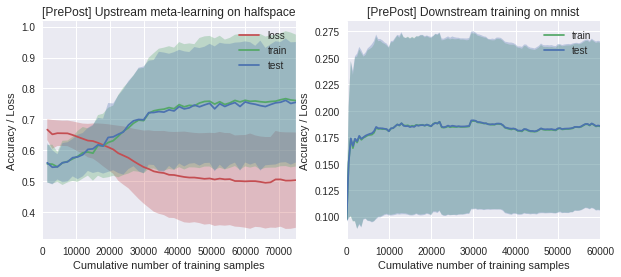

Mean essential stats across all runs:
Last upstream loss: 0.5032
Last upstream train accuracy: 0.7608
Last upstream test accuracy: 0.7552
Last downstream loss: 2.2646
Last downstream train accuracy: 0.1853
Last downstream test accuracy: 0.1857



In [7]:
# Plot aggregated stats.
agg_stats_prepost_up = convert_multi_stats_uncertainty(stats_prepost_up)
agg_stats_prepost_down = convert_multi_stats_uncertainty(stats_prepost_down)
plot_curves(agg_stats_prepost_up, agg_stats_prepost_down,
            '[PrePost] Upstream meta-learning on ' + dataset_up,
            '[PrePost] Downstream training on ' + dataset_down,
            'figs/generalization_prepost_' + dataset_up + '_' + dataset_down,
            no_downstream_loss=True)

## Train vanilla net

In [13]:
# Instantiate model.
brain_vanilla = FFBrainNet(
    n_down, m_down, l, w, p, cap, full_gd=True)

In [14]:
# Evaluate model.
print('==== Vanilla ====')
X_train, y_train, X_test, y_test = quick_get_data('mnist', 28 * 28)
print('Training VANILLA brain instance (WITH backprop) on mnist...')
stats_vanilla = train_downstream(
    X_train, y_train, brain_vanilla, num_epochs=num_epochs_downstream,
    batch_size=100, vanilla=True, learn_rate=5e-3,
    X_test=X_test, y_test=y_test, verbose=False, stats_interval=500)

==== Vanilla ====
mnist_train: 60000
mnist_test: 10000
Training VANILLA brain instance (WITH backprop) on mnist...
INITIAL train accuracy: 0.1239
INITIAL test accuracy: 0.1270
Epoch 1 / 1 ...


100%|██████████| 600/600 [01:19<00:00,  7.55it/s]


Last loss: 1.5639
Last train accuracy: 0.9134
Last test accuracy: 0.9119


In [ ]:
# Plot aggregated stats.
plot_curves(None, stats_vanilla, None,
            '[Vanilla] Downstream training on ' + dataset_down,
            'figs/generalization_vanilla_' + dataset_down,
            no_downstream_loss=True)